In [102]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [103]:
cd '/content/drive/My Drive/Practice'

/content/drive/My Drive/Practice


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [0]:
label = pd.read_pickle('train_label.pkl')
test = pd.read_pickle('test_image.pkl')
train = pd.read_pickle('train_image.pkl')

In [0]:
scaler = MinMaxScaler()
scaler.fit(train)
test = scaler.transform(test)
train = scaler.transform(train)

In [79]:
set(label)

{0, 2, 3, 6}

In [0]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [0]:
x_train, x_test, y_train, y_test = train_test_split(train,label, test_size=0.10, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

In [0]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_val = np.array(x_val)
y_val = np.array(y_val)

In [0]:
x_train[0]

Text(0.5, 1.0, '(Label: 0)')

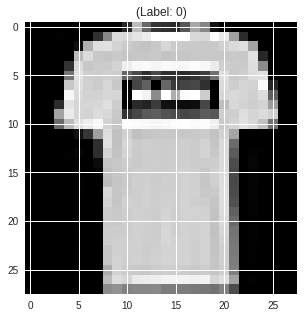

In [67]:
plt.figure(figsize=[5,5])

# Display the first image in training data
curr_img = np.reshape(train[0], (28,28))
curr_lbl = np.argmax(label[0])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label[curr_lbl]) + ")")

In [0]:
y_train = pd.get_dummies(y_train,columns = ["0","2","3","6"])
y_test = pd.get_dummies(y_test,columns = ["0","2","3","6"])
y_val = pd.get_dummies(y_val,columns = ["0","2","3","6"])

In [0]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1,28,28,1)
x_val = x_val.reshape(-1,28,28,1)

In [112]:
x_train.shape,x_test.shape

((5400, 28, 28, 1), (800, 28, 28, 1))

In [113]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [115]:
model.fit(x_train,y_train,batch_size=64,epochs=20,validation_data=(x_val, y_val))

Train on 5400 samples, validate on 1800 samples
Epoch 1/20
5400/5400 [==============================] - 10s 2ms/sample - loss: 0.7961 - acc: 0.6572 - val_loss: 0.6796 - val_acc: 0.7139
Epoch 2/20
5400/5400 [==============================] - 9s 2ms/sample - loss: 0.6347 - acc: 0.7324 - val_loss: 0.5692 - val_acc: 0.7594
Epoch 3/20
5400/5400 [==============================] - 9s 2ms/sample - loss: 0.5782 - acc: 0.7624 - val_loss: 0.5204 - val_acc: 0.7900
Epoch 4/20
5400/5400 [==============================] - 9s 2ms/sample - loss: 0.5352 - acc: 0.7863 - val_loss: 0.5091 - val_acc: 0.8028
Epoch 5/20
5400/5400 [==============================] - 10s 2ms/sample - loss: 0.5053 - acc: 0.8024 - val_loss: 0.4827 - val_acc: 0.8033
Epoch 6/20
5400/5400 [==============================] - 9s 2ms/sample - loss: 0.4746 - acc: 0.8165 - val_loss: 0.4395 - val_acc: 0.8328
Epoch 7/20
5400/5400 [==============================] - 10s 2ms/sample - loss: 0.4573 - acc: 0.8224 - val_loss: 0.4283 - val_acc: 0.83

In [116]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8675


In [0]:
test = np.array(test)
test = test.reshape(-1,28,28,1)

In [0]:
pre = model.predict(test)
pre = np.argmax(pre,axis=1)
test_labs = pd.DataFrame(pre,columns=["Predictions"])
test_labs["Predictions"] = test_labs["Predictions"].map({0:0,1:2,2:3,3:6})

In [0]:
test_labs.to_csv("predictions.csv",index = False)

In [0]:
model.save('model.h5')